In [9]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [10]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm, ggpubr, ggsignif, cowplot, lsmeans, forestplot)

# Functions

In [11]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

# Paths

In [12]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [13]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [14]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

# 

In [15]:
sample_df <- readr::read_rds( paste0(datapath, "int_sample_df.rds"))

In [16]:
table(sample_df$Relapse)


  0   1 
431 103 

In [17]:
table(meta_div$sampletype)


cfDNA  PBMC Tumor 
  274   558    18 

In [18]:
gliphpca <- readr::read_rds(file = paste0(datapath, "GLIPH/gliph_PCA.rds"))

# 1- Quantrreg for each patient post-therapy

In [19]:
sample_df$cyclenum <- as.numeric(gsub("X0", "", sample_df$cycle) )

In [20]:
# split to 3 dataframes: one for flow one for tcr and ncr

tcr_df <- sample_df[ !is.na(sample_df$TRB), ]
flow_df <- sample_df[ !is.na(sample_df$CD3) & sample_df$CD3 > 0, ]
ncr_df <- flow_df[ !is.na(flow_df$`TIM3%`), ]

In [21]:
# remove X01
tcr_df <- tcr_df[ tcr_df$cycle != "X01", ]
flow_df <- flow_df[ flow_df$cycle != "X01", ]
ncr_df <- ncr_df[ ncr_df$cycle != "X01", ]

In [22]:
# minimum two samples in each dataframe

mytab <- table(tcr_df$Patient, tcr_df$cycle)
mytab <- mytab[rowSums(mytab == 1) >= 2, ] 
tcr_df_min2 <- tcr_df[tcr_df$Patient %in% rownames(mytab), ]

mytab <- table(flow_df$Patient, flow_df$cycle)
mytab <- mytab[rowSums(mytab == 1) >= 2, ] 
flow_df_min2 <- flow_df[flow_df$Patient %in% rownames(mytab), ]

mytab <- table(ncr_df$Patient, ncr_df$cycle)
mytab <- mytab[rowSums(mytab == 1) >= 2, ] 
ncr_df_min2 <- ncr_df[ncr_df$Patient %in% rownames(mytab), ]

In [23]:
colnames(tcr_df_min2)

[1] "sample_id"                "Patient"                 
  [3] "cycle"                    "FOLD"                    
  [5] "ATC"                      "Age"                     
  [7] "Disease_type"             "TE_fold"                 
  [9] "CD3"                      "EM"                      
 [11] "CM"                       "Naïve"                   
 [13] "SCM"                      "TE"                      
 [15] "EM%"                      "CM%"                     
 [17] "Naïve%"                   "SCM%"                    
 [19] "TE%"                      "Naïve/TE"                
 [21] "N+CM+SCM/TE+EM"           "PD-1"                    
 [23] "PDL1"                     "LAG3"                    
 [25] "TIM3"                     "CTLA4"                   
 [27] "PD1%"                     "PDL1%"                   
 [29] "LAG3%"                    "TIM3%"                   
 [31] "CTLA4%"                   "Any NCR"                 
 [33] "PD1 + LAG3 + TIM3"        "cancergroup"             
 [35] "agegroup"                 "foldgroup"               
 [37] "Remission"                "Relapse"                 
 [39] "Transplant"               "CART"                    
 [41] "vital_status"             "LOF"                     
 [43] "TRB"                      "Reads"                   
 [45] "CPKR"                     "Average_reads"           
 [47] "VMR"                      "Max_reads"               
 [49] "Singletons"               "Doubletons"              
 [51] "qD"                       "Sample_Coverage"         
 [53] "observed_Richness"        "estimated_Richness"      
 [55] "SE_Richeness"             "observed_Shannon"        
 [57] "estimated_Shannon"        "SE_Shannon"              
 [59] "observed_Simpson"         "estimated_Simpson"       
 [61] "SE_Simpson"               "basename"                
 [63] "file"                     "sampletype"              
 [65] "Group"                    "log10shann"              
 [67] "aveTiRP"                  "medTiRP"                 
 [69] "HLA_PC1"                  "HLA_PC2"                 
 [71] "HLA_PC3"                  "V_PC1"                   
 [73] "V_PC2"                    "V_PC3"                   
 [75] "J_PC1"                    "J_PC2"                   
 [77] "J_PC3"                    "samplename"              
 [79] "gliph_n"                  "CMV"                     
 [81] "EBV"                      "HCV"                     
 [83] "Flu"                      "hs"                      
 [85] "cfDNA_TRB"                "cfDNA_Reads"             
 [87] "cfDNA_CPKR"               "cfDNA_Average_reads"     
 [89] "cfDNA_VMR"                "cfDNA_Max_reads"         
 [91] "cfDNA_Singletons"         "cfDNA_Doubletons"        
 [93] "cfDNA_qD"                 "cfDNA_Sample_Coverage"   
 [95] "cfDNA_observed_Richness"  "cfDNA_estimated_Richness"
 [97] "cfDNA_SE_Richeness"       "cfDNA_observed_Shannon"  
 [99] "cfDNA_estimated_Shannon"  "cfDNA_SE_Shannon"        
[101] "cfDNA_observed_Simpson"   "cfDNA_estimated_Simpson" 
[103] "cfDNA_SE_Simpson"         "cfDNA_basename"          
[105] "cfDNA_file"               "cfDNA_sampletype"        
[107] "cfDNA_Group"              "cfDNA_log10shann"        
[109] "cfDNA_aveTiRP"            "cfDNA_medTiRP"           
[111] "cfDNA_V_PC1"              "cfDNA_V_PC2"             
[113] "cfDNA_V_PC3"              "cfDNA_J_PC1"             
[115] "cfDNA_J_PC2"              "cfDNA_J_PC3"             
[117] "cfDNA_samplename"         "cfDNA_gliph_n"           
[119] "cfDNA_CMV"                "cfDNA_EBV"               
[121] "cfDNA_HCV"                "cfDNA_Flu"               
[123] "cfDNA_hs"                 "cyclenum"

In [24]:
mypca <- gliphpca$x

In [25]:
head(mypca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC401,PC402,PC403,PC404,PC405,PC406,PC407,PC408,PC409,PC410
Leukemia:CHP_319_X05-PBMC,-1.832848,-1.848061,1.5108913,-0.49758730,1.2475238,-1.1360350,0.31823413,-0.4143386,0.6170181,-1.0179550,...,2.669408e-06,5.670315e-07,2.964113e-07,2.895842e-07,7.670149e-07,2.819900e-08,2.735590e-08,5.498801e-13,1.779233e-15,2.433906e-14
Leukemia:CHP_323_X03-PBMC,-1.695182,-1.546052,0.8125126,0.82635255,1.3400379,-0.8997030,0.41926939,0.8133113,0.8203821,-1.2305051,...,1.041408e-08,1.025073e-09,-5.162535e-11,-9.601026e-11,4.679352e-10,8.000886e-11,2.667992e-11,1.227782e-12,4.196931e-14,2.528275e-14
Leukemia:CHP_323_X03-cfDNA,-1.366894,-1.385488,1.1380872,-0.72678739,-0.2197026,-0.6123179,-0.16907199,-0.3350745,0.6239349,-0.5601353,...,-1.273392e-10,1.131420e-09,-1.550594e-09,-2.905974e-09,1.753213e-09,7.181918e-11,1.257699e-11,1.572636e-13,-1.202917e-14,4.294039e-13
Leukemia:CHP_323_X05-PBMC,-1.817785,-1.767662,1.3588968,-0.06781653,1.2968171,-0.9912957,0.08897417,-0.3813115,0.6998146,-1.1352729,...,1.802349e-08,1.154930e-09,-1.631466e-10,5.320026e-10,8.046112e-10,-8.617327e-11,1.554410e-11,4.395170e-13,9.237343e-14,-6.303549e-14
Leukemia:CHP_323_X05-cfDNA,-1.834019,-1.854525,1.5039276,-0.45283254,1.2292121,-1.0240096,0.41719095,-0.4801349,0.6323353,-1.0474976,...,2.579343e-09,2.089269e-10,6.295258e-10,4.570877e-10,7.234622e-10,8.061983e-11,3.758555e-11,5.064426e-13,1.320639e-13,-7.209537e-13
Leukemia:CHP_326_X05-cfDNA,-1.814312,-1.339670,1.3144928,-0.28673092,1.1913963,-1.3059445,0.37146329,-0.4349749,0.2904381,-1.0892887,...,-4.927307e-08,-4.586669e-08,-5.256553e-08,-1.441592e-07,6.484804e-08,1.629817e-09,5.139111e-10,3.796691e-13,2.076405e-14,3.713948e-13


In [26]:
tcr_df_min2$GLIPH_PC1 <- mypca[ match(tcr_df_min2$samplename,  rownames(mypca)) , "PC1"]
tcr_df_min2$GLIPH_PC2 <- mypca[ match(tcr_df_min2$samplename,  rownames(mypca)) , "PC2"]

In [27]:
head(tcr_df_min2)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,cfDNA_samplename,cfDNA_gliph_n,cfDNA_CMV,cfDNA_EBV,cfDNA_HCV,cfDNA_Flu,cfDNA_hs,cyclenum,GLIPH_PC1,GLIPH_PC2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
320,CHP_323_03,CHP_323,X03,0,786.24,1,HR ALL,0,0,NA,...,Leukemia:CHP_323_X03-cfDNA,71,8,2,0,5,1,3,-1.695182,-1.5460521
322,CHP_323_05,CHP_323,X05,0,979.50,1,HR ALL,0,0,NA,...,Leukemia:CHP_323_X05-cfDNA,9,0,0,0,0,0,5,-1.817785,-1.7676623
346,CHP_328_04,CHP_328,X04,0,130.82,7,SR ALL,0,0,NA,...,NA,NA,NA,NA,NA,NA,NA,4,1.201478,4.0826196
347,CHP_328_05,CHP_328,X05,0,91.16,7,SR ALL,0,0,NA,...,Leukemia:CHP_328_X05-cfDNA,0,0,0,0,0,0,5,-1.041710,-0.6360027
361,CHP_331_04,CHP_331,X04,0,0.00,5,SR ALL,0,0,NA,...,NA,NA,NA,NA,NA,NA,NA,4,-1.844016,-1.8657837
362,CHP_331_05,CHP_331,X05,0,0.00,5,SR ALL,0,0,NA,...,Leukemia:CHP_331_X05-cfDNA,15,0,0,0,0,0,5,-1.729523,-1.7568730


In [28]:
tcr_df_min2 <- tcr_df_min2 %>%
group_by(Patient) %>%
mutate(quantreg_log10shann = quantreg::rq(log10shann ~ cyclenum, tau = 0.5)$coef[2] / n() )  %>%
# mutate(quantreg_gliph_n = quantreg::rq(gliph_n ~ cyclenum, tau = 0.5)$coef[2] / n() ) %>%
# mutate(quantreg_V_PC1 = quantreg::rq( V_PC1 ~ cyclenum, tau = 0.5)$coef[2] / n() ) %>%
# mutate(quantreg_V_PC2 = quantreg::rq( V_PC2 ~ cyclenum, tau = 0.5)$coef[2] / n() ) %>%
# mutate(quantreg_J_PC1 = quantreg::rq( J_PC1 ~ cyclenum, tau = 0.5)$coef[2] / n() ) %>%
# mutate(quantreg_J_PC2 = quantreg::rq( J_PC2 ~ cyclenum, tau = 0.5)$coef[2] / n() ) %>%
# mutate(quantreg_GLIPH_PC1 = quantreg::rq( GLIPH_PC1 ~ cyclenum, tau = 0.5)$coef[2] / n() ) %>%
# mutate(quantreg_GLIPH_PC2 = quantreg::rq( GLIPH_PC2 ~ cyclenum, tau = 0.5)$coef[2] / n() ) %>%

ungroup()

Warning message:
“There were 4 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_log10shann = quantreg::rq(log10shann ~ cyclenum, tau =
  0.5)$coef[2]/n()`.
ℹ In group 7: `Patient = "CHP_343"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3 remaining warnings.”


In [29]:
ncr_df_min2 <- ncr_df_min2 %>%
group_by(Patient) %>%
mutate(quantreg_TIM = quantreg::rq(`TIM3%` ~ cyclenum, tau = 0.5)$coef[2] / n()) %>%
mutate(quantreg_LAG = quantreg::rq(`LAG3%` ~ cyclenum, tau = 0.5)$coef[2] / n() ) %>%
mutate(quantreg_PD1 = quantreg::rq( `PD1%` ~ cyclenum, tau = 0.5)$coef[2] / n() ) %>%
ungroup()

Warning message:
“There were 4 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_TIM = quantreg::rq(`TIM3%` ~ cyclenum, tau =
  0.5)$coef[2]/n()`.
ℹ In group 3: `Patient = "CHP_343"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3 remaining warnings.”
Warning message:
“There were 6 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_LAG = quantreg::rq(`LAG3%` ~ cyclenum, tau =
  0.5)$coef[2]/n()`.
ℹ In group 3: `Patient = "CHP_343"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 5 remaining warnings.”
Warning message:
“There were 4 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_PD1 = quantreg::rq(`PD1%` ~ cyclenum, tau =
  0.5)$coef[2]/n()`.
ℹ In group 3: `Patient = "CHP_343"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3

In [30]:
flow_df_min2 <- flow_df_min2 %>%
group_by(Patient) %>%
mutate(quantreg_N = quantreg::rq(`Naïve%` ~ cyclenum, tau = 0.5)$coef[2] / n() ) %>%
mutate(quantreg_CM = quantreg::rq(`CM%` ~ cyclenum, tau = 0.5)$coef[2]  / n()) %>%
mutate(quantreg_SCM = quantreg::rq( `SCM%` ~ cyclenum, tau = 0.5)$coef[2] / n() ) %>%
mutate(quantreg_EM = quantreg::rq( `EM%` ~ cyclenum, tau = 0.5)$coef[2] / n()) %>%
mutate(quantreg_TE = quantreg::rq( `TE%` ~ cyclenum, tau = 0.5)$coef[2] / n() ) %>%
ungroup()

Warning message:
“There were 5 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_N = quantreg::rq(`Naïve%` ~ cyclenum, tau =
  0.5)$coef[2]/n()`.
ℹ In group 4: `Patient = "CHP_347"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 4 remaining warnings.”
Warning message:
“There were 7 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_CM = quantreg::rq(`CM%` ~ cyclenum, tau =
  0.5)$coef[2]/n()`.
ℹ In group 2: `Patient = "CHP_332"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 6 remaining warnings.”
Warning message:
“There were 7 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_SCM = quantreg::rq(`SCM%` ~ cyclenum, tau =
  0.5)$coef[2]/n()`.
ℹ In group 2: `Patient = "CHP_332"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 6 rem

In [31]:
head(flow_df_min2)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,cfDNA_EBV,cfDNA_HCV,cfDNA_Flu,cfDNA_hs,cyclenum,quantreg_N,quantreg_CM,quantreg_SCM,quantreg_EM,quantreg_TE
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_343_02,CHP_343,X02,0.3,459.04,8,EWS,0.3,1135,16,...,0,0,0,0,2,0.1026273,2.8897801,-0.6594274,0.4025038,-2.940411
CHP_343_03,CHP_343,X03,0.6,370.30,8,EWS,0.6,1650,16,...,NA,NA,NA,NA,3,0.1026273,2.8897801,-0.6594274,0.4025038,-2.940411
CHP_343_04,CHP_343,X04,1.5,536.63,8,EWS,1.5,2612,146,...,0,0,0,0,4,0.1026273,2.8897801,-0.6594274,0.4025038,-2.940411
CHP_343_05,CHP_343,X05,2.1,371.20,8,EWS,2.1,2436,152,...,0,0,0,0,5,0.1026273,2.8897801,-0.6594274,0.4025038,-2.940411
CHP_347_02,CHP_347,X02,6.4,1038.59,13,ALL,6.4,927,15,...,0,0,0,0,2,-0.6003918,-0.6090838,-1.0940369,-0.1080237,2.652185
CHP_347_03,CHP_347,X03,37.6,768.80,13,ALL,37.6,2379,27,...,0,0,0,0,3,-0.6003918,-0.6090838,-1.0940369,-0.1080237,2.652185


In [32]:
flow_df_min2_pt <- flow_df_min2[ !duplicated(flow_df_min2$Patient), ]
ncr_df_min2_pt <- ncr_df_min2[ !duplicated(ncr_df_min2$Patient), ]
tcr_df_min2_pt <- tcr_df_min2[ !duplicated(tcr_df_min2$Patient), ]

In [33]:
# merge all the dataframes, allow NAs to include all data
df_min2_pt <- merge(flow_df_min2_pt, ncr_df_min2_pt, by = c("Patient", "cancergroup"), all = TRUE)
df_min2_pt <- merge(df_min2_pt, tcr_df_min2_pt, by = c("Patient", "cancergroup"), all = TRUE)

In [34]:
head(df_min2_pt)

,Patient,cancergroup,sample_id.x,cycle.x,FOLD.x,ATC.x,Age.x,Disease_type.x,TE_fold.x,CD3.x,...,cfDNA_gliph_n,cfDNA_CMV,cfDNA_EBV,cfDNA_HCV,cfDNA_Flu,cfDNA_hs,cyclenum,GLIPH_PC1,GLIPH_PC2,quantreg_log10shann
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CHP_323,Leukemia,NA,NA,NA,NA,NA,NA,NA,NA,...,71,8,2,0,5,1,3,-1.695182,-1.5460521,0.08397725
2,CHP_328,Leukemia,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,4,1.201478,4.0826196,-0.20431926
3,CHP_330,Solid tumors,CHP_330_02,X02,1.9,0,5,OS,1.9,2425,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,CHP_331,Leukemia,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,4,-1.844016,-1.8657837,0.29320592
5,CHP_332,Solid tumors,CHP_332_02,X02,NA,0,10,ERMS,NA,2403,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,CHP_338,Leukemia,NA,NA,NA,NA,NA,NA,NA,NA,...,4,0,0,0,0,0,3,2.268234,-0.1504075,-0.02765594


In [35]:
# df_min2_pt$quantreg_gliph_n <- NULL

In [36]:
mycol <- colnames(df_min2_pt)[grepl("quantreg", colnames(df_min2_pt))]

In [37]:
mycol

[1] "quantreg_N"          "quantreg_CM"         "quantreg_SCM"       
[4] "quantreg_EM"         "quantreg_TE"         "quantreg_TIM"       
[7] "quantreg_LAG"        "quantreg_PD1"        "quantreg_log10shann"

In [38]:
# scale
for(i in mycol){
    newvar <- paste0(i, "_scaled")
df_min2_pt[[newvar]] <- as.vector(scale(df_min2_pt[[i]]))
}

In [39]:
# rank
for(i in mycol){
    newvar <- paste0(i, "_rank")
df_min2_pt[[newvar]] <- rank(df_min2_pt[[i]])
}

In [40]:
min(df_min2_pt$quantreg_LAG, na.rm = TRUE)

[1] -4.776677

In [41]:
mycol <- colnames(df_min2_pt)[grepl("scaled", colnames(df_min2_pt))]

In [42]:
mycol

[1] "quantreg_N_scaled"          "quantreg_CM_scaled"        
[3] "quantreg_SCM_scaled"        "quantreg_EM_scaled"        
[5] "quantreg_TE_scaled"         "quantreg_TIM_scaled"       
[7] "quantreg_LAG_scaled"        "quantreg_PD1_scaled"       
[9] "quantreg_log10shann_scaled"

In [43]:
table(df_min2_pt$cancergroup)


           Leukemia            Lymphoma        Solid tumors T-cell malignancies 
                 31                  10                  23                   2 

In [44]:
df_min2_pt_long <- tidyr::pivot_longer(df_min2_pt, all_of(mycol), names_to = "Feature", values_to = "Quantreg")

In [45]:
df_min2_pt_long <- as.data.frame(df_min2_pt_long)

In [46]:
df_min2_pt_long_narm <- df_min2_pt_long[ !is.na(df_min2_pt_long$Quantreg),]

Boxplot

In [47]:
# use scaled for viz
df_min2_pt_long_narm$Featurename <- gsub("_scaled", "", df_min2_pt_long_narm$Feature)
df_min2_pt_long_narm$Featurename <- gsub("quantreg_", "", df_min2_pt_long_narm$Featurename)

In [48]:
table(df_min2_pt_long_narm$cancergroup)


           Leukemia            Lymphoma        Solid tumors T-cell malignancies 
                155                  62                 155                  10 

In [49]:
table(df_min2_pt_long_narm$Featurename)


        CM         EM        LAG log10shann          N        PD1        SCM 
        43         43         39         50         43         39         43 
        TE        TIM 
        43         39 

In [51]:
df_min2_pt_long_narm$Featurename <- factor(df_min2_pt_long_narm$Featurename, 
levels = c("N", "SCM", "CM", "EM", "TE", "PD1", "LAG", "TIM",
"log10shann" 
# "V_PC1", "V_PC2", "J_PC1", "J_PC2", "gliph_n", "GLIPH_PC1", "GLIPH_PC2"
))

In [52]:
df_min2_pt_long_narm$Featurename <- factor(df_min2_pt_long_narm$Featurename, 
levels = rev(levels(df_min2_pt_long_narm$Featurename) ) )

In [53]:
p1 <- ggplot(df_min2_pt_long_narm, aes(y = Featurename, x = Quantreg)) +  geom_point(aes( color = cancergroup), position = position_jitter(w = 0.05, h = 0.15)) +
        geom_boxplot(outlier.shape = NA, alpha = 0, color = "#b7b2b2") + myaxis + myplot + scale_color_manual(values = group_col)

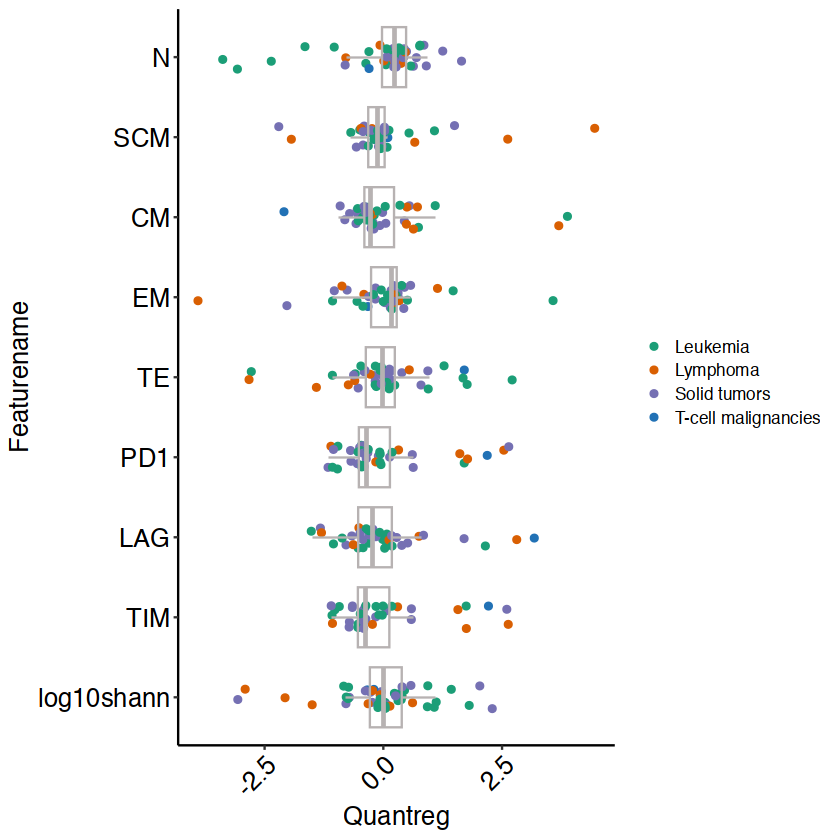

In [54]:
p1

In [55]:
pdf( paste0(plotpath, "quantreq.pdf"), width = 6, height = 8)
p1 + theme(legend.position = "bottom")
dev.off()

pdf 
  2

LR and forestplot

Use unscaled data for glm

In [56]:
mycol <- colnames(df_min2_pt)[grepl("quantreg", colnames(df_min2_pt))]

In [57]:
mycol <- mycol[ !grepl("scaled", mycol)]

In [58]:
mycol <- mycol[ !grepl("rank", mycol)]

In [59]:
mycol

[1] "quantreg_N"          "quantreg_CM"         "quantreg_SCM"       
[4] "quantreg_EM"         "quantreg_TE"         "quantreg_TIM"       
[7] "quantreg_LAG"        "quantreg_PD1"        "quantreg_log10shann"

In [60]:
df_min2_pt_long <- tidyr::pivot_longer(df_min2_pt, all_of(mycol), names_to = "Feature", values_to = "Quantreg")

In [61]:
df_min2_pt_long <- as.data.frame(df_min2_pt_long)

In [62]:
df_min2_pt_long_narm <- df_min2_pt_long[ !is.na(df_min2_pt_long$Quantreg),]

In [63]:
feat_lr_mat <- matrix(nrow = length(unique(df_min2_pt_long_narm$Feature)), ncol = 7)
rownames(feat_lr_mat) <- unique(df_min2_pt_long_narm$Feature)
colnames(feat_lr_mat) <- c('coef', 'exp(coef)', 'SE', 'z', 'Pr(>|z|)', 'lower.95' ,'upper.95')

In [64]:
feat_lr_mat

,coef,exp(coef),SE,z,Pr(>|z|),lower.95,upper.95
quantreg_log10shann,NA,NA,NA,NA,NA,NA,NA
quantreg_N,NA,NA,NA,NA,NA,NA,NA
quantreg_CM,NA,NA,NA,NA,NA,NA,NA
quantreg_SCM,NA,NA,NA,NA,NA,NA,NA
quantreg_EM,NA,NA,NA,NA,NA,NA,NA
quantreg_TE,NA,NA,NA,NA,NA,NA,NA
quantreg_TIM,NA,NA,NA,NA,NA,NA,NA
quantreg_LAG,NA,NA,NA,NA,NA,NA,NA
quantreg_PD1,NA,NA,NA,NA,NA,NA,NA


In [65]:
for(i in rownames(feat_lr_mat)){
   # message(i)
    f <- as.formula(paste0("Relapse~", i,""))  # lets just do univariate
    lrmodel <- glm(f, data=df_min2_pt, family = "binomial") 
    sumlrmodel <- summary(lrmodel)
#print(sumlrmodel)
    myCI <- exp(confint.default(lrmodel, level = 0.95) )

    feat_lr_mat[i,"coef"] <- sumlrmodel$coefficients[2,"Estimate"]
    # exp of estimate is the odds ratio
    feat_lr_mat[i,"exp(coef)"] <- exp(sumlrmodel$coefficients[2,"Estimate"])
    feat_lr_mat[i,"SE"] <- sumlrmodel$coefficients[2,"Std. Error"]
    feat_lr_mat[i,"z"] <- sumlrmodel$coefficients[2,"z value"]
    feat_lr_mat[i,"Pr(>|z|)"] <- sumlrmodel$coefficients[2,"Pr(>|z|)"]
    #from myCI
    feat_lr_mat[i,"lower.95"] <- myCI[2,1]
    feat_lr_mat[i,"upper.95"] <- myCI[2,2]
}

In [66]:
feat_lr_mat

,coef,exp(coef),SE,z,Pr(>|z|),lower.95,upper.95
quantreg_log10shann,-0.56960661,0.5657480,1.42055609,-0.4009744,0.68843898,0.0349497,9.158040
quantreg_N,0.03077689,1.0312554,0.07559978,0.4071029,0.68393238,0.8892330,1.195961
quantreg_CM,0.05502885,1.0565711,0.04469458,1.2312198,0.21824066,0.9679538,1.153301
quantreg_SCM,-0.03930582,0.9614566,0.09489945,-0.4141838,0.67873949,0.7982725,1.157999
quantreg_EM,0.82733145,2.2872071,0.43355526,1.9082491,0.05635902,0.9778282,5.349934
quantreg_TE,-0.04883038,0.9523426,0.03662605,-1.3332146,0.18246140,0.8863742,1.023221
quantreg_TIM,-0.06379834,0.9381942,0.10753157,-0.5932987,0.55298127,0.7599092,1.158307
quantreg_LAG,-0.02357057,0.9767050,0.16377208,-0.1439230,0.88556127,0.7085335,1.346376
quantreg_PD1,-0.06379834,0.9381942,0.10753157,-0.5932987,0.55298127,0.7599092,1.158307


In [67]:
fdr_df <- as.matrix(p.adjust(feat_lr_mat[,5], method = "fdr"))
colnames(fdr_df)[1] <- "fdr"
feat_lr_mat <- cbind(feat_lr_mat, fdr_df)

In [68]:
feat_lr_mat <- as.data.frame(feat_lr_mat)

In [69]:
feat_lr_mat$Feature <- gsub("quantreg_", "", rownames(feat_lr_mat))
feat_lr_mat$Feature <- gsub("_rank", "", feat_lr_mat$Feature)

In [70]:
(feat_lr_mat)

,coef,exp(coef),SE,z,Pr(>|z|),lower.95,upper.95,fdr,Feature
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
quantreg_log10shann,-0.56960661,0.5657480,1.42055609,-0.4009744,0.68843898,0.0349497,9.158040,0.7744939,log10shann
quantreg_N,0.03077689,1.0312554,0.07559978,0.4071029,0.68393238,0.8892330,1.195961,0.7744939,N
quantreg_CM,0.05502885,1.0565711,0.04469458,1.2312198,0.21824066,0.9679538,1.153301,0.6547220,CM
quantreg_SCM,-0.03930582,0.9614566,0.09489945,-0.4141838,0.67873949,0.7982725,1.157999,0.7744939,SCM
quantreg_EM,0.82733145,2.2872071,0.43355526,1.9082491,0.05635902,0.9778282,5.349934,0.5072312,EM
quantreg_TE,-0.04883038,0.9523426,0.03662605,-1.3332146,0.18246140,0.8863742,1.023221,0.6547220,TE
quantreg_TIM,-0.06379834,0.9381942,0.10753157,-0.5932987,0.55298127,0.7599092,1.158307,0.7744939,TIM
quantreg_LAG,-0.02357057,0.9767050,0.16377208,-0.1439230,0.88556127,0.7085335,1.346376,0.8855613,LAG
quantreg_PD1,-0.06379834,0.9381942,0.10753157,-0.5932987,0.55298127,0.7599092,1.158307,0.7744939,PD1


In [71]:
feat_lr_mat$mean <- feat_lr_mat$`exp(coef)`
feat_lr_mat$lower <- feat_lr_mat$`lower.95`
feat_lr_mat$upper <- feat_lr_mat$`upper.95`

In [72]:
feat_lr_mat$OR <- as.character(round(feat_lr_mat$`exp(coef)`, 2) )
feat_lr_mat$p <- as.character(round(feat_lr_mat$`Pr(>|z|)`, 2) )
feat_lr_mat$FDR <- as.character(round(feat_lr_mat$fdr, 2) )

In [73]:
p2 <- feat_lr_mat |>
  forestplot(
    labeltext = c(Feature, OR, p, FDR),
    clip = c(0, 2), 
    boxsize = 0.2,
    vertices = TRUE,
    xlog = FALSE, zero = 1
  ) |>
  fp_set_style(
    box = "royalblue",
    line = "darkblue",
    summary = "royalblue"
  ) |>
  fp_add_header(
    Feature = c("", "Feature"),
    OR = c("", "OR"),
    p = c("", "p value"),
    FDR = c("", "FDR")
  )


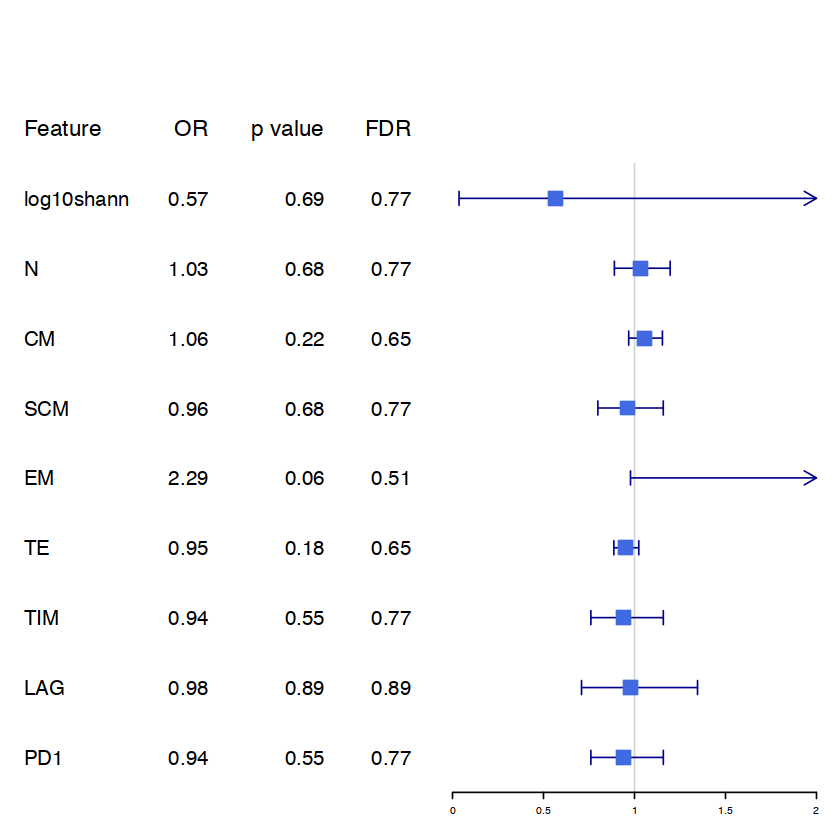

In [74]:
p2

In [75]:
pdf(paste0(plotpath, "forestplot_quantreq.pdf"), width=6, height=8)
p2
dev.off()

pdf 
  2

In [ ]:
# pdf(file = paste0(plotpath,"Univar_forestplot.pdf"),
#     width = 7, height = 10,
#     useDingbats = FALSE, onefile = F)
# forestplot(tabtext, hrs, new_page = TRUE, xlog = TRUE,
#                    title = "Survival analysis (iMATRIX-atezo)(p-value, FDR)", boxsize = 0.25)
# dev.off()

# 2- Baseline associations

In [76]:
sample_df$cyclenum <- as.numeric(gsub("X0", "", sample_df$cycle) )

In [77]:
# split to 3 dataframes: one for flow one for tcr and ncr

tcr_df <- sample_df[ !is.na(sample_df$TRB), ]
flow_df <- sample_df[ !is.na(sample_df$CD3) & sample_df$CD3 > 0, ]
ncr_df <- flow_df[ !is.na(flow_df$`TIM3%`), ]

In [78]:
# only X01
tcr_df <- tcr_df[ tcr_df$cycle == "X01", ]
flow_df <- flow_df[ flow_df$cycle == "X01", ]
ncr_df <- ncr_df[ ncr_df$cycle == "X01", ]

In [79]:
tcr_df$GLIPH_PC1 <- mypca[ match(tcr_df$samplename,  rownames(mypca)) , "PC1"]
tcr_df$GLIPH_PC2 <- mypca[ match(tcr_df$samplename,  rownames(mypca)) , "PC2"]

In [80]:
# merge all the dataframes, allow NAs to include all data
df_x01 <- merge(flow_df, ncr_df, by = c("Patient", "cancergroup"), all = TRUE)
df_x01 <- merge(df_x01, tcr_df, by = c("Patient", "cancergroup"), all = TRUE)

In [81]:
head(df_x01)

,Patient,cancergroup,sample_id.x,cycle.x,FOLD.x,ATC.x,Age.x,Disease_type.x,TE_fold.x,CD3.x,...,cfDNA_samplename,cfDNA_gliph_n,cfDNA_CMV,cfDNA_EBV,cfDNA_HCV,cfDNA_Flu,cfDNA_hs,cyclenum,GLIPH_PC1,GLIPH_PC2
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,...,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CHP_330,Solid tumors,CHP_330_01,X01,0.9,0.00,5,OS,0.9,2437,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,CHP_332,Solid tumors,CHP_332_01,X01,8.2,0.00,10,ERMS,8.2,3628,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,CHP_343,Solid tumors,CHP_343_01,X01,1.0,219.30,8,EWS,1.0,2421,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,CHP_346,Solid tumors,CHP_346_01,X01,0.8,331.70,1,NB,0.8,637,...,NA,NA,NA,NA,NA,NA,NA,1,-1.7338604,-1.773150
5,CHP_347,Leukemia,CHP_347_01,X01,0.8,126.72,13,ALL,0.8,1701,...,Leukemia:CHP_347_X01-cfDNA,0,0,0,0,0,0,1,-0.6656651,-1.249249
6,CHP_348,Solid tumors,CHP_348_01,X01,11.5,50.96,18,OS,11.5,1125,...,Solidtumors:CHP_348_X01-cfDNA,3,0,0,0,0,0,1,-1.0018511,-1.929393


In [82]:
# df_min2_pt$quantreg_gliph_n <- NULL

In [83]:
mycol <- c('EM%','CM%','Naïve%','SCM%','TE%', 
# 'HLA_PC1','HLA_PC2','HLA_PC3',
# 'V_PC1','V_PC2','J_PC1','J_PC2', 
'PD1%', 'TIM3%', 'LAG3%', 
'log10shann') 
#"gliph_n", "GLIPH_PC1", "GLIPH_PC2")

In [84]:
mycol

[1] "EM%"        "CM%"        "Naïve%"     "SCM%"       "TE%"       
[6] "PD1%"       "TIM3%"      "LAG3%"      "log10shann"

In [85]:
# scale
for(i in mycol){
    newvar <- paste0(i, "_scaled")
df_x01[[newvar]] <- as.vector(scale(df_x01[[i]]))
}

In [86]:
# rank
for(i in mycol){
    newvar <- paste0(i, "_rank")
df_x01[[newvar]] <- rank(df_x01[[i]])
}

In [87]:
mycol <- colnames(df_x01)[grepl("scaled", colnames(df_x01))]

In [88]:
mycol

[1] "EM%_scaled"        "CM%_scaled"        "Naïve%_scaled"    
[4] "SCM%_scaled"       "TE%_scaled"        "PD1%_scaled"      
[7] "TIM3%_scaled"      "LAG3%_scaled"      "log10shann_scaled"

In [89]:
table(df_x01$cancergroup)


           Leukemia            Lymphoma        Solid tumors T-cell malignancies 
                 30                  12                  27                   4 

In [90]:
df_x01_long <- tidyr::pivot_longer(df_x01, all_of(mycol), names_to = "Feature", values_to = "X01")

In [91]:
df_x01_long <- as.data.frame(df_x01_long)

In [92]:
df_x01_long_narm <- df_x01_long[ !is.na(df_x01_long$X01),]

In [93]:
head(df_x01_long_narm)

,Patient,cancergroup,sample_id.x,cycle.x,FOLD.x,ATC.x,Age.x,Disease_type.x,TE_fold.x,CD3.x,...,CM%_rank,Naïve%_rank,SCM%_rank,TE%_rank,PD1%_rank,TIM3%_rank,LAG3%_rank,log10shann_rank,Feature,X01
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
28,CHP_346,Solid tumors,CHP_346_01,X01,0.8,331.7,1,NB,0.8,637,...,7,36,3,1,14,14,13,15,EM%_scaled,-0.6665081
29,CHP_346,Solid tumors,CHP_346_01,X01,0.8,331.7,1,NB,0.8,637,...,7,36,3,1,14,14,13,15,CM%_scaled,-0.7547849
30,CHP_346,Solid tumors,CHP_346_01,X01,0.8,331.7,1,NB,0.8,637,...,7,36,3,1,14,14,13,15,Naïve%_scaled,2.9439196
31,CHP_346,Solid tumors,CHP_346_01,X01,0.8,331.7,1,NB,0.8,637,...,7,36,3,1,14,14,13,15,SCM%_scaled,-1.0708562
32,CHP_346,Solid tumors,CHP_346_01,X01,0.8,331.7,1,NB,0.8,637,...,7,36,3,1,14,14,13,15,TE%_scaled,-1.7271353
33,CHP_346,Solid tumors,CHP_346_01,X01,0.8,331.7,1,NB,0.8,637,...,7,36,3,1,14,14,13,15,PD1%_scaled,-0.6093947


Boxplot

In [94]:
# use scaled for viz
df_x01_long_narm$Featurename <- gsub("_scaled", "", df_x01_long_narm$Feature)

In [95]:
table(df_x01_long_narm$Featurename )


       CM%        EM%      LAG3% log10shann     Naïve%       PD1%       SCM% 
        36         36         34         44         36         34         36 
       TE%      TIM3% 
        36         34 

In [96]:
df_x01_long_narm$Featurename  <- factor(df_x01_long_narm$Featurename , 
levels = c(  
  #"GLIPH_PC2", "GLIPH_PC1","gliph_n","J_PC2", "J_PC1",  "V_PC2", "V_PC1",
  "log10shann" ,
  "LAG3%", "TIM3%", "PD1%" ,"TE%","EM%" ,"CM%", "SCM%", "Naïve%"))

In [97]:
p1 <- ggplot(df_x01_long_narm, aes(y = Featurename, x = X01)) +  geom_point(aes( color = cancergroup), position = position_jitter(w = 0.05, h = 0.15)) +
        geom_boxplot(outlier.shape = NA, alpha = 0, color = "#b7b2b2") + myaxis + myplot + scale_color_manual(values = group_col)

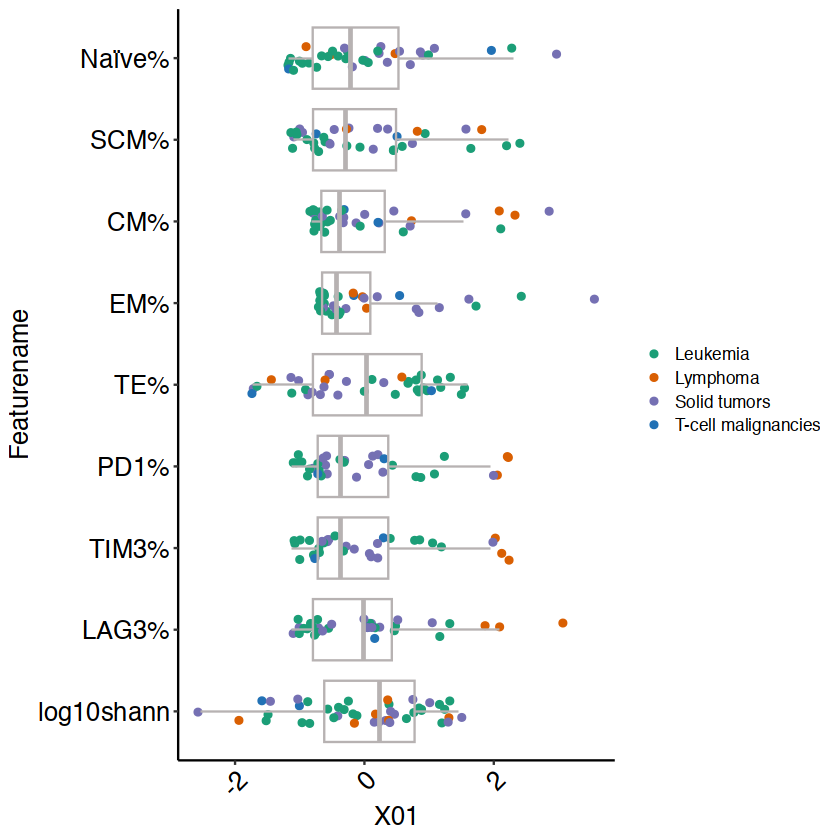

In [98]:
p1

In [99]:
pdf( paste0(plotpath, "X01.pdf"), width = 6, height = 8)
p1 + theme(legend.position = "bottom")
dev.off()

pdf 
  2

LR and forestplot

Use unscaled data for glm

In [100]:
mycol <- c(  
  # "GLIPH_PC2", "GLIPH_PC1","gliph_n","J_PC2", "J_PC1",  "V_PC2", "V_PC1",
  "log10shann" ,
  "LAG3%", "TIM3%", "PD1%" ,"TE%","EM%" ,"CM%", "SCM%", "Naïve%")

In [101]:
rev(mycol)

[1] "Naïve%"     "SCM%"       "CM%"        "EM%"        "TE%"       
[6] "PD1%"       "TIM3%"      "LAG3%"      "log10shann"

In [102]:
colnames(df_x01)

[1] "Patient"                    "cancergroup"               
  [3] "sample_id.x"                "cycle.x"                   
  [5] "FOLD.x"                     "ATC.x"                     
  [7] "Age.x"                      "Disease_type.x"            
  [9] "TE_fold.x"                  "CD3.x"                     
 [11] "EM.x"                       "CM.x"                      
 [13] "Naïve.x"                    "SCM.x"                     
 [15] "TE.x"                       "EM%.x"                     
 [17] "CM%.x"                      "Naïve%.x"                  
 [19] "SCM%.x"                     "TE%.x"                     
 [21] "Naïve/TE.x"                 "N+CM+SCM/TE+EM.x"          
 [23] "PD-1.x"                     "PDL1.x"                    
 [25] "LAG3.x"                     "TIM3.x"                    
 [27] "CTLA4.x"                    "PD1%.x"                    
 [29] "PDL1%.x"                    "LAG3%.x"                   
 [31] "TIM3%.x"                    "CTLA4%.x"                  
 [33] "Any NCR.x"                  "PD1 + LAG3 + TIM3.x"       
 [35] "agegroup.x"                 "foldgroup.x"               
 [37] "Remission.x"                "Relapse.x"                 
 [39] "Transplant.x"               "CART.x"                    
 [41] "vital_status.x"             "LOF.x"                     
 [43] "TRB.x"                      "Reads.x"                   
 [45] "CPKR.x"                     "Average_reads.x"           
 [47] "VMR.x"                      "Max_reads.x"               
 [49] "Singletons.x"               "Doubletons.x"              
 [51] "qD.x"                       "Sample_Coverage.x"         
 [53] "observed_Richness.x"        "estimated_Richness.x"      
 [55] "SE_Richeness.x"             "observed_Shannon.x"        
 [57] "estimated_Shannon.x"        "SE_Shannon.x"              
 [59] "observed_Simpson.x"         "estimated_Simpson.x"       
 [61] "SE_Simpson.x"               "basename.x"                
 [63] "file.x"                     "sampletype.x"              
 [65] "Group.x"                    "log10shann.x"              
 [67] "aveTiRP.x"                  "medTiRP.x"                 
 [69] "HLA_PC1.x"                  "HLA_PC2.x"                 
 [71] "HLA_PC3.x"                  "V_PC1.x"                   
 [73] "V_PC2.x"                    "V_PC3.x"                   
 [75] "J_PC1.x"                    "J_PC2.x"                   
 [77] "J_PC3.x"                    "samplename.x"              
 [79] "gliph_n.x"                  "CMV.x"                     
 [81] "EBV.x"                      "HCV.x"                     
 [83] "Flu.x"                      "hs.x"                      
 [85] "cfDNA_TRB.x"                "cfDNA_Reads.x"             
 [87] "cfDNA_CPKR.x"               "cfDNA_Average_reads.x"     
 [89] "cfDNA_VMR.x"                "cfDNA_Max_reads.x"         
 [91] "cfDNA_Singletons.x"         "cfDNA_Doubletons.x"        
 [93] "cfDNA_qD.x"                 "cfDNA_Sample_Coverage.x"   
 [95] "cfDNA_observed_Richness.x"  "cfDNA_estimated_Richness.x"
 [97] "cfDNA_SE_Richeness.x"       "cfDNA_observed_Shannon.x"  
 [99] "cfDNA_estimated_Shannon.x"  "cfDNA_SE_Shannon.x"        
[101] "cfDNA_observed_Simpson.x"   "cfDNA_estimated_Simpson.x" 
[103] "cfDNA_SE_Simpson.x"         "cfDNA_basename.x"          
[105] "cfDNA_file.x"               "cfDNA_sampletype.x"        
[107] "cfDNA_Group.x"              "cfDNA_log10shann.x"        
[109] "cfDNA_aveTiRP.x"            "cfDNA_medTiRP.x"           
[111] "cfDNA_V_PC1.x"              "cfDNA_V_PC2.x"             
[113] "cfDNA_V_PC3.x"              "cfDNA_J_PC1.x"             
[115] "cfDNA_J_PC2.x"              "cfDNA_J_PC3.x"             
[117] "cfDNA_samplename.x"         "cfDNA_gliph_n.x"           
[119] "cfDNA_CMV.x"                "cfDNA_EBV.x"               
[121] "cfDNA_HCV.x"                "cfDNA_Flu.x"               
[123] "cfDNA_hs.x"                 "cyclenum.x"                
[125] "sample_id.y"               

In [103]:
mycol

[1] "log10shann" "LAG3%"      "TIM3%"      "PD1%"       "TE%"       
[6] "EM%"        "CM%"        "SCM%"       "Naïve%"

In [104]:
df_x01_long <- tidyr::pivot_longer(df_x01, all_of(rev(mycol)), names_to = "Feature", values_to = "X01")

In [105]:
df_x01_long <- as.data.frame(df_x01_long)

In [106]:
df_x01_long_narm <- df_x01_long[ !is.na(df_x01_long$X01),]

In [107]:
feat_lr_mat <- matrix(nrow = length(unique(df_x01_long_narm$Feature)), ncol = 7)
rownames(feat_lr_mat) <- unique(df_x01_long_narm$Feature)
colnames(feat_lr_mat) <- c('coef', 'exp(coef)', 'SE', 'z', 'Pr(>|z|)', 'lower.95' ,'upper.95')

In [108]:
head(df_x01)

,Patient,cancergroup,sample_id.x,cycle.x,FOLD.x,ATC.x,Age.x,Disease_type.x,TE_fold.x,CD3.x,...,log10shann_scaled,EM%_rank,CM%_rank,Naïve%_rank,SCM%_rank,TE%_rank,PD1%_rank,TIM3%_rank,LAG3%_rank,log10shann_rank
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CHP_330,Solid tumors,CHP_330_01,X01,0.9,0.00,5,OS,0.9,2437,...,NA,37,37,37,37,37,35,35,35,45
2,CHP_332,Solid tumors,CHP_332_01,X01,8.2,0.00,10,ERMS,8.2,3628,...,NA,38,38,38,38,38,36,36,36,46
3,CHP_343,Solid tumors,CHP_343_01,X01,1.0,219.30,8,EWS,1.0,2421,...,NA,39,39,39,39,39,37,37,37,47
4,CHP_346,Solid tumors,CHP_346_01,X01,0.8,331.70,1,NB,0.8,637,...,-0.4068475,4,7,36,3,1,14,14,13,15
5,CHP_347,Leukemia,CHP_347_01,X01,0.8,126.72,13,ALL,0.8,1701,...,0.4157920,8,2,17,1,27,28,28,6,28
6,CHP_348,Solid tumors,CHP_348_01,X01,11.5,50.96,18,OS,11.5,1125,...,0.1473301,22,32,21,24,15,15,15,4,21


In [109]:
for(i in rownames(feat_lr_mat)){
   # message(i)
    f <- as.formula(paste0("Relapse~`", i,"`"))  #univariate
    lrmodel <- glm(f, data=df_x01, family = "binomial") 
    sumlrmodel <- summary(lrmodel)
#print(sumlrmodel)
    myCI <- exp(confint.default(lrmodel, level = 0.95) )

    feat_lr_mat[i,"coef"] <- sumlrmodel$coefficients[2,"Estimate"]
    # exp of estimate is the odds ratio
    feat_lr_mat[i,"exp(coef)"] <- exp(sumlrmodel$coefficients[2,"Estimate"])
    feat_lr_mat[i,"SE"] <- sumlrmodel$coefficients[2,"Std. Error"]
    feat_lr_mat[i,"z"] <- sumlrmodel$coefficients[2,"z value"]
    feat_lr_mat[i,"Pr(>|z|)"] <- sumlrmodel$coefficients[2,"Pr(>|z|)"]
    #from myCI
    feat_lr_mat[i,"lower.95"] <- myCI[2,1]
    feat_lr_mat[i,"upper.95"] <- myCI[2,2]
}

In [110]:
feat_lr_mat

,coef,exp(coef),SE,z,Pr(>|z|),lower.95,upper.95
Naïve%,-0.01815077,0.9820130,0.02566940,-0.7070973,0.4795060,0.9338291,1.032683
SCM%,0.09708357,1.1019525,0.07781660,1.2475946,0.2121796,0.9460743,1.283514
CM%,-0.04614661,0.9549020,0.06483850,-0.7117162,0.4766406,0.8409461,1.084300
EM%,-0.03996647,0.9608217,0.08774537,-0.4554823,0.6487623,0.8090098,1.141121
TE%,0.01222561,1.0123007,0.01806477,0.6767654,0.4985548,0.9770859,1.048785
PD1%,-0.01791591,0.9822436,0.05891879,-0.3040780,0.7610685,0.8751197,1.102481
TIM3%,-0.01791591,0.9822436,0.05891879,-0.3040780,0.7610685,0.8751197,1.102481
LAG3%,-0.16345365,0.8492059,0.12068796,-1.3543493,0.1756250,0.6703216,1.075828
log10shann,0.24249750,1.2744281,0.67199091,0.3608643,0.7182009,0.3414410,4.756801


In [111]:
fdr_df <- as.matrix(p.adjust(feat_lr_mat[,5], method = "fdr"))
colnames(fdr_df)[1] <- "fdr"
feat_lr_mat <- cbind(feat_lr_mat, fdr_df)

In [112]:
feat_lr_mat <- as.data.frame(feat_lr_mat)

In [113]:
feat_lr_mat$Feature <- rownames(feat_lr_mat)

In [114]:
feat_lr_mat$mean <- feat_lr_mat$`exp(coef)`
feat_lr_mat$lower <- feat_lr_mat$`lower.95`
feat_lr_mat$upper <- feat_lr_mat$`upper.95`

In [115]:
feat_lr_mat$OR <- as.character(round(feat_lr_mat$`exp(coef)`, 2) )
feat_lr_mat$p <- as.character(round(feat_lr_mat$`Pr(>|z|)`, 2) )
feat_lr_mat$FDR <- as.character(round(feat_lr_mat$fdr, 2) )

In [116]:
p3 <- feat_lr_mat |>
  forestplot(
    labeltext = c(Feature, OR, p, FDR),
    clip = c(0, 2), 
    boxsize = 0.2,
    vertices = TRUE,
    xlog = FALSE, zero = 1
  ) |>
  fp_set_style(
    box = "royalblue",
    line = "darkblue",
    summary = "royalblue"
  ) |>
  fp_add_header(
    Feature = c("", "Feature"),
    OR = c("", "OR"),
    p = c("", "p value"),
    FDR = c("", "FDR")
  )


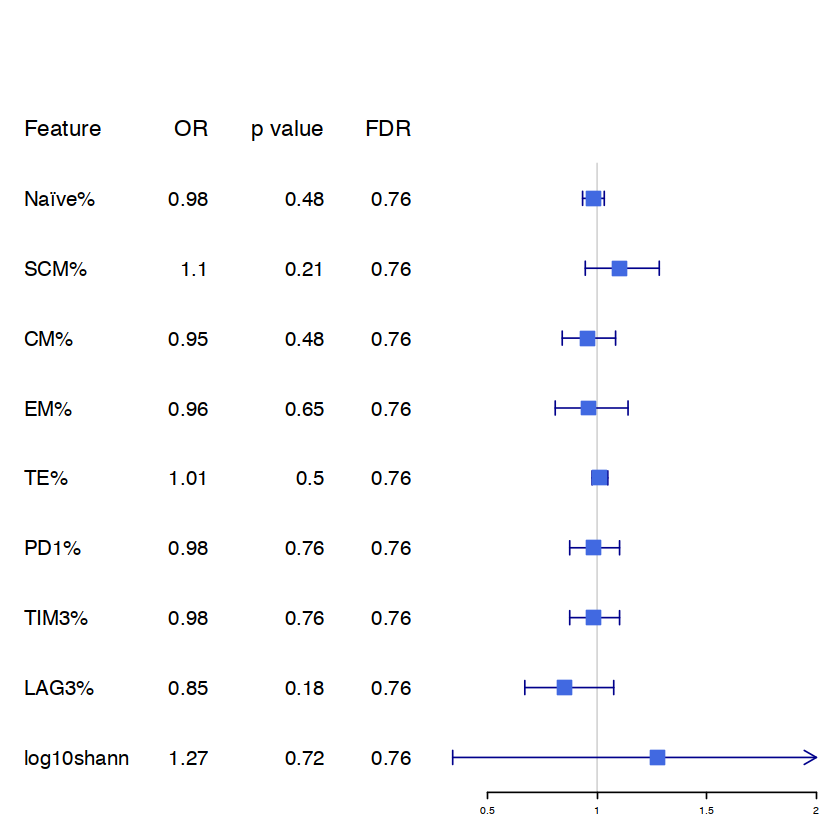

In [117]:
p3

In [118]:
pdf(paste0(plotpath, "forestplot_X01.pdf"), width=6, height=8)
p3
dev.off()

pdf 
  2

 # spiderplots - AUC

In [ ]:
meta_div$Relapse[ is.na(meta_div$Relapse) ] <- 0
meta_div$Relapse <- as.factor(meta_div$Relapse)

In [ ]:
cfdna <- meta_div[ which(meta_div$sampletype == "cfDNA"),]

In [ ]:
pbmc1 <- meta_div[ meta_div$sampletype == "PBMC" & !is.na(meta_div$CD3),]
pbmc1 <- pbmc1[ pbmc1$CD3 > 0,]

In [ ]:
pbmc1$cfTCR_shann <- cfdna[ match(pbmc1$sample_id, cfdna$sample_id), "log10shann"]

In [ ]:
pbmc1$cyclenum <- as.numeric(gsub("X0", "", pbmc1$cycle) )

In [ ]:
mytab <- table(pbmc1$Patient, pbmc1$cycle)
mytab <- mytab[rowSums(mytab == 1) > 1, ]
# baseline_patients <- rownames(mytab)[mytab[, 1] == 1]
df1 <- pbmc1[pbmc1$Patient %in% rownames(mytab), ]

In [ ]:
dim(df1)

In [ ]:
df1$cfTCR_shann <- cfdna[ match(df1$sample_id, cfdna$sample_id), "log10shann"]

In [ ]:
# result <- df1 %>%
#     group_by(Patient) %>%
#     mutate(DifferenceN = `Naïve%` - `Naïve%`[cycle == "X01"]) %>%
#     mutate(DifferenceCM = `CM%` - `CM%`[cycle == "X01"]) %>%
#     mutate(DifferenceSCM = `SCM%` - `SCM%`[cycle == "X01"]) %>%
#     mutate(DifferenceEM = `EM%` - `EM%`[cycle == "X01"]) %>%
#     mutate(DifferenceTE = `TE%` - `TE%`[cycle == "X01"]) %>%
#     mutate(DifferenceLAG = `LAG3%` - `LAG3%`[cycle == "X01"]) %>%
#     mutate(DifferenceTIM = `TIM3%` - `TIM3%`[cycle == "X01"]) %>%
#     mutate(DifferencePD1 = `PD1%` - `PD1%`[cycle == "X01"]) %>%
#     mutate(DifferenceTCR = log10shann - log10shann[cycle == "X01"])  %>%
#     mutate(DifferencecfTCR = cfTCR_shann - cfTCR_shann[cycle == "X01"])


In [ ]:
library(pracma)

In [ ]:
result2 <- df1 %>%
    group_by(Patient) %>%
    mutate(AUC_N = trapz(cyclenum, `Naïve%`) / n() ) %>%
    mutate(AUC_CM = trapz(cyclenum, `CM%`) / n() ) %>%
    mutate(AUC_SCM = trapz(cyclenum, `SCM%`) / n()  ) %>%
    mutate(AUC_EM = trapz(cyclenum, `EM%`) / n() ) %>%
    mutate(AUC_TE = trapz(cyclenum, `TE%`) / n() ) %>%
    mutate(AUC_LAG = trapz(cyclenum, `LAG3%`) / n() ) %>%
    mutate(AUC_TIM = trapz(cyclenum, `TIM3%`) / n() ) %>%
    mutate(AUC_PD1 = trapz(cyclenum, `PD1%`) / n() ) %>%
    mutate(AUC_TCR = trapz(cyclenum, `log10shann`) / n() ) %>%
     mutate(AUC_cfTCR = trapz(cyclenum, cfTCR_shann) / n() ) %>%
    ungroup()

In [ ]:
mypts <- result2[ !duplicated(result2$Patient), ]
# mypts <- mypts[ !is.na(mypts$AUC_TCR), ]

In [ ]:
# pca <- readr::read_rds(paste0(datapath, "/HLA/INT_HLA_PCA_postqc.rds"))

In [ ]:
# rownames(pca) <- paste0("CHP_", "", rownames(pca))
# rownames(pca) <- gsub("-.*", "", rownames(pca))

In [ ]:
# head(pca)

In [ ]:
# mypts$HLA_PC1 <- pca[ match(mypts$Patient, rownames(pca)), "PC1"]
# mypts$HLA_PC2 <- pca[ match(mypts$Patient, rownames(pca)), "PC2"]
# mypts$HLA_PC3 <- pca[ match(mypts$Patient, rownames(pca)), "PC3"]

In [ ]:
head(mypts)

In [ ]:
# myfit0 <- lm(AUC_TCR ~  HLA_PC2 + HLA_PC3 + cancergroup + Age, data= mypts)
# myfit1 <- lm(AUC_TCR ~  HLA_PC1 + HLA_PC2 + HLA_PC3 + cancergroup + Age, data= mypts)

# anova(myfit0, myfit1)

In [ ]:
# summary.lm(myfit1)

In [ ]:
# result_noX01 <- result[ result$cycle != "X01", ]

In [ ]:
# pbmc <- pbmc[ pbmc$CD3 > 0,]

In [ ]:
tmp <- mypts[!is.na(mypts$AUC_cfTCR),]

In [ ]:
mymat <- as.matrix(tmp[ , c( "AUC_N", "AUC_SCM", "AUC_CM", "AUC_EM", "AUC_TE", "AUC_LAG", "AUC_PD1", "AUC_cfTCR")])

In [ ]:
rownames(mymat) <- tmp$Patient

In [ ]:
makematrix_4hm <- function(df, var, name ){
    mymat <- df[[var]]
names(mymat) <- df[["Patient"]]
mymat <- t(as.matrix(mymat))
rownames(mymat) <- name
    
    return(mymat)
}

In [ ]:
mycohort <- makematrix_4hm(tmp, "Disease_type", "disease")
mysample <- makematrix_4hm(tmp, "cancergroup", "cancergroup")
mygroup <- makematrix_4hm(tmp, "Relapse", "Relapse")

In [ ]:
myatc <- makematrix_4hm(tmp, "ATC", "ATC")

In [ ]:
myage <- makematrix_4hm(tmp, "Age", "Age")

In [ ]:
age_col <- c("blue", "red")
atc_col <- c("blue", "red")

In [ ]:
group_col <- c("blue", "red", "green")
names(group_col) <- names(table(tmp$Relapse))

In [ ]:
# cohort_col <- c("blue", "red", "green", "orange", "purple", "yellow", "black", "grey", "pink", 
# "brown", "cyan", "magenta", "navy", "maroon", "gray","gold", "darkgreen") 
# names(cohort_col) <- names(table(allpbmcs$Disease_type))

In [ ]:
type_col <- c("blue", "red", "green", "orange", "purple")
names(type_col) <- names(table(tmp$cancergroup))

In [ ]:
library(ComplexHeatmap)

In [ ]:
age_hm <- Heatmap(myage, col = age_col,  height = unit(1,"cm"))
atc_hm <- Heatmap(myatc, col = atc_col,  height = unit(1,"cm"))

In [ ]:
cohort_hm <- Heatmap(mycohort, col = cohort_col, height = unit(1,"cm"))
sample_hm <- Heatmap(mysample, col = type_col, , height = unit(1,"cm"))
group_hm <- Heatmap(mygroup, col = group_col, , height = unit(1,"cm"))

In [ ]:
hm <- Heatmap(t(scale(mymat)))

In [ ]:
hm %v%  sample_hm %v% group_hm %v% age_hm %v%  atc_hm

In [ ]:
fit1 <- lmerTest::lmer( Relapse ~ AUC_N + AUC_TE + AUC_LAG + AUC_TCR + (1 | Patient), data = mypts)


In [ ]:
# logistic regression
mypts$Relapse <- as.factor(mypts$Relapse)
mypts$Relapse <- relevel(mypts$Relapse, ref = "0")

In [ ]:
fit1 <- lmerTest::lmer( Relapse ~ AUC_N + AUC_TE + AUC_LAG + AUC_TCR + (1 | Patient), data = mypts)

fit2 <- lme4::glmer( Relapse ~ AUC_N + AUC_TE + AUC_LAG + (1 | Patient), data = mypts, family = binomial)

In [ ]:
lmer

In [ ]:
anova(fit1)

In [ ]:
anova(fit1, fit2)

# Perturbation scores

In [ ]:
cfdna <- meta_div[ which(meta_div$sampletype == "cfDNA"),]

In [ ]:
pbmc1 <- meta_div[ meta_div$sampletype == "PBMC" & !is.na(meta_div$CD3),]
pbmc1 <- pbmc1[ pbmc1$CD3 > 0,]

In [ ]:
pbmc1$cfTCR_shann <- cfdna[ match(pbmc1$sample_id, cfdna$sample_id), "log10shann"]

In [ ]:
pbmc1$cyclenum <- as.numeric(gsub("X0", "", pbmc1$cycle) )

In [ ]:
pbmc1$scaled_N <- scale(pbmc1$`Naïve%`)
pbmc1$scaled_CM <- scale(pbmc1$`CM%`)
pbmc1$scaled_SCM <- scale(pbmc1$`SCM%`)
pbmc1$scaled_EM <- scale(pbmc1$`EM%`)
pbmc1$scaled_TE <- scale(pbmc1$`TE%`)
pbmc1$scaled_LAG <- scale(pbmc1$`LAG3%`)
pbmc1$scaled_TIM <- scale(pbmc1$`TIM3%`)
pbmc1$scaled_PD1 <- scale(pbmc1$`PD1%`)
pbmc1$scaled_TCR <- scale(pbmc1$log10shann)
pbmc1$scaled_cfTCR <- scale(pbmc1$cfTCR_shann)

In [ ]:
mytab <- table(pbmc1$Patient, pbmc1$cycle)
mytab <- mytab[rowSums(mytab == 1) > 1, ]
# baseline_patients <- rownames(mytab)[mytab[, 1] == 1]
df1 <- pbmc1[pbmc1$Patient %in% rownames(mytab), ]

In [ ]:
dim(df1)

In [ ]:
rownames(df1) <- df1$sample_id

In [ ]:
result$Relapse[ is.na(result$Relapse) ] <- 0
result$Relapse <- as.factor(result$Relapse)

In [ ]:
result2 <- df1 %>%
    group_by(Patient) %>%
    mutate(AUC_N = trapz(cyclenum, scaled_N) / n() ) %>%
    mutate(AUC_CM = trapz(cyclenum, scaled_CM) / n() ) %>%
    mutate(AUC_SCM = trapz(cyclenum, scaled_SCM) / n()  ) %>%
    mutate(AUC_EM = trapz(cyclenum, scaled_EM) / n() ) %>%
    mutate(AUC_TE = trapz(cyclenum, scaled_TE) / n() ) %>%
    mutate(AUC_LAG = trapz(cyclenum, scaled_LAG) / n() ) %>%
    mutate(AUC_TIM = trapz(cyclenum, scaled_TIM) / n() ) %>%
    mutate(AUC_PD1 = trapz(cyclenum, scaled_PD1) / n() ) %>%
    mutate(AUC_TCR = trapz(cyclenum, scaled_TCR) / n() ) %>%
    mutate(AUC_cfTCR = trapz(cyclenum, scaled_cfTCR) / n() ) %>%
    ungroup()

In [ ]:
mypts <- result2[ !duplicated(result2$Patient), ]
# mypts <- mypts[ !is.na(mypts$AUC_TCR), ]

In [ ]:
mypts <- as.data.frame(mypts)

In [ ]:
rownames(mypts) <- mypts$sample_id

In [ ]:
# result <- as.data.frame(result)
# rownames(result) <- result$sample_id

In [ ]:
tmp <- as.data.frame(c(mean(mypts$AUC_N), mypts$AUC_N ) )
rownames(tmp) <- c("mean", rownames(mypts))
mypts$dist_N <- as.matrix(dist(tmp))[-1,1]

tmp <- as.data.frame(c(mean(mypts$AUC_CM), mypts$AUC_CM ) )
rownames(tmp) <- c("mean", rownames(mypts))
mypts$dist_CM <- as.matrix(dist(tmp))[-1,1]

tmp <- as.data.frame(c(mean(mypts$AUC_SCM), mypts$AUC_SCM ) )
rownames(tmp) <- c("mean", rownames(mypts))
mypts$dist_SCM <- as.matrix(dist(tmp))[-1,1]

tmp <- as.data.frame(c(mean(mypts$AUC_EM), mypts$AUC_EM ) )
rownames(tmp) <- c("mean", rownames(mypts))
mypts$dist_EM <- as.matrix(dist(tmp))[-1,1]

tmp <- as.data.frame(c(mean(mypts$AUC_TE), mypts$AUC_TE ) )
rownames(tmp) <- c("mean", rownames(mypts))
mypts$dist_TE <- as.matrix(dist(tmp))[-1,1]

tmp <- as.data.frame(c(mean(mypts$AUC_LAG, na.rm = T), mypts$AUC_LAG ) )
rownames(tmp) <- c("mean", rownames(mypts))
mypts$dist_LAG <- as.matrix(dist(tmp))[-1,1]

tmp <- as.data.frame(c(mean(mypts$AUC_TIM, na.rm = T), mypts$AUC_TIM ) )
rownames(tmp) <- c("mean", rownames(mypts))
mypts$dist_TIM <- as.matrix(dist(tmp))[-1,1]

tmp <- as.data.frame(c(mean(mypts$AUC_PD1, na.rm = T), mypts$AUC_PD1 ) )
rownames(tmp) <- c("mean", rownames(mypts))
mypts$dist_PD1 <- as.matrix(dist(tmp))[-1,1]

tmp <- as.data.frame(c(mean(mypts$AUC_TCR, na.rm = T), mypts$AUC_TCR ) )
rownames(tmp) <- c("mean", rownames(mypts))
mypts$dist_TCR <- as.matrix(dist(tmp))[-1,1]

tmp <- as.data.frame(c(mean(mypts$AUC_cfTCR, na.rm = T), mypts$AUC_cfTCR ) )
rownames(tmp) <- c("mean", rownames(mypts))
mypts$dist_cfTCR <- as.matrix(dist(tmp))[-1,1]

In [ ]:
head(mypts)

In [ ]:
head(mypts$Relapse)

In [ ]:
# logistic regression
mypts$Relapse <- as.factor(mypts$Relapse)
mypts$Relapse <- relevel(mypts$Relapse, ref = "0")

rms::lrm( Relapse ~ (dist_N + dist_TE + dist_PD1)^3 + cancergroup, data = mypts)

In [ ]:
tmp <- mypts#[!is.na(mypts$AUC_cfTCR),]

In [ ]:
mymat <- as.matrix(tmp[ , c( "dist_N", "dist_CM", "dist_SCM", "dist_EM", "dist_TE", "dist_LAG", "dist_TIM", "dist_PD1")])

In [ ]:
rownames(mymat) <- tmp$Patient

In [ ]:
makematrix_4hm <- function(df, var, name ){
    mymat <- df[[var]]
names(mymat) <- df[["Patient"]]
mymat <- t(as.matrix(mymat))
rownames(mymat) <- name
    
    return(mymat)
}

In [ ]:
mycohort <- makematrix_4hm(tmp, "Disease_type", "disease")
mysample <- makematrix_4hm(tmp, "cancergroup", "cancergroup")
mygroup <- makematrix_4hm(tmp, "Relapse", "Relapse")

In [ ]:
myatc <- makematrix_4hm(tmp, "ATC", "ATC")

In [ ]:
myage <- makematrix_4hm(tmp, "Age", "Age")

In [ ]:
age_col <- c("blue", "red")
atc_col <- c("blue", "red")

In [ ]:
group_col <- c("blue", "red", "green")
names(group_col) <- names(table(tmp$Relapse))

In [ ]:
# cohort_col <- c("blue", "red", "green", "orange", "purple", "yellow", "black", "grey", "pink", 
# "brown", "cyan", "magenta", "navy", "maroon", "gray","gold", "darkgreen") 
# names(cohort_col) <- names(table(allpbmcs$Disease_type))

In [ ]:
type_col <- c("blue", "red", "green", "orange", "purple")
names(type_col) <- names(table(tmp$cancergroup))

In [ ]:
library(ComplexHeatmap)

In [ ]:
age_hm <- Heatmap(myage, col = age_col,  height = unit(1,"cm"))
atc_hm <- Heatmap(myatc, col = atc_col,  height = unit(1,"cm"))

In [ ]:
cohort_hm <- Heatmap(mycohort, col = cohort_col, height = unit(1,"cm"))
sample_hm <- Heatmap(mysample, col = type_col, , height = unit(1,"cm"))
group_hm <- Heatmap(mygroup, col = group_col, , height = unit(1,"cm"))

In [ ]:
hm <- Heatmap(t(scale(mymat)))

In [ ]:
hm %v%  sample_hm %v% group_hm %v% age_hm %v%  atc_hm